# Gemaakt op 07/05/2025 door martijn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 10
15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit the Notebook to your portfolio when you're finished.

In [19]:
my_data = pd.read_csv("./games.csv")
my_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


# vertaling

wat ik hier dus moet gaan doen is minimaal 2 colommen van numerieke data vergelijken. Mar we gaan natuurlijk als 1e checken met `my_correlations = my_data.corr(numeric_only=True)` naar de correlaties tussen alle numerieke colommen.

## Verwachting:

Ik denk dat er tussen price_final en positive_ratio wel een verband gaat zitten, of het positief is of negatief weet ik niet. ik denk dat de correlatie ergens rondt de 0.6 / -0.6 komt te zitten.
Verder denk ik ook dat r een correlatie zit tussen user_reviews en price_final, en ik denk dat dit een positieve relatie is rondt de 0.8. Dat betekent dus een scatter chart met de volgende lijn richting: `/`



In [14]:
my_correlations = my_data.corr(numeric_only=True)
my_correlations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
app_id,1.00,-0.02,-0.18,-0.15,0.16,-0.04,-0.01,-0.02,0.03,0.01
win,-0.02,1.00,0.07,0.06,-0.10,0.01,0.04,0.04,0.01,-0.00
mac,-0.18,0.07,1.00,0.63,0.07,0.02,-0.01,-0.01,-0.04,0.00
linux,-0.15,0.06,0.63,1.00,0.07,0.02,-0.01,-0.01,-0.02,0.00
positive_ratio,0.16,-0.10,0.07,0.07,1.00,0.02,-0.01,-0.02,0.00,-0.00
user_reviews,-0.04,0.01,0.02,0.02,0.02,1.00,0.03,-0.01,-0.01,-0.00
price_final,-0.01,0.04,-0.01,-0.01,-0.01,0.03,1.00,0.89,-0.14,-0.00
price_original,-0.02,0.04,-0.01,-0.01,-0.02,-0.01,0.89,1.00,0.06,-0.00
discount,0.03,0.01,-0.04,-0.02,0.00,-0.01,-0.14,0.06,1.00,0.00
steam_deck,0.01,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,1.00


## Resultaat (deel1)

okay dit vind ik heel grappig, want ik had niet door dat mac, windows en linux ook gezien werden als numeric, en ik vind het wel heel grappig om dus te zien dat mac en linux een positive correlation hebben. Hier gaan we dus zo even een scatterchart van maken.

Verder heb ik er niet aan gedacht dat price_final en price_original ook een relation gingen hebben. Dit is logisch want meestal verandert het niet zo veel, tenzij er toevallig een slae was toen deze dataset gepublished werd. Maar bij deze gaan we ook een scatterchart maken

Verder is er gewoon geen correlatie tussen price_final en user_reviews, en ook niet tussen price_final en positive_ratio. Dit is opzich redelijk logisch want hoe goed een spel is hangt niet af van de prijd. maar ik had wel verwacht dat er minder reviews gingen zijn de duurder een spel is. maar blijkbaar niet. Maar toch gaan we hier ook naar kijken in een scatter chart.

KeyError: 'mac'

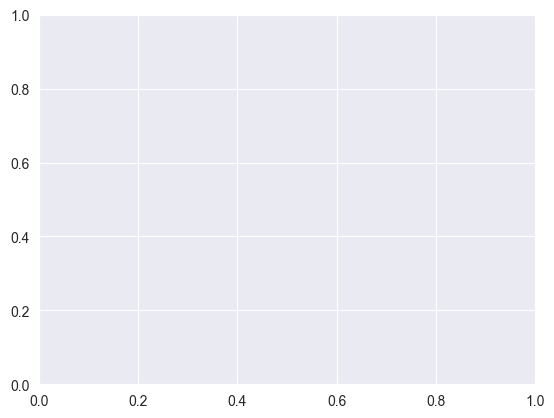

In [25]:
my_data.plot(kind='scatter', x='mac', y='linux')

dit resultaat vindt ik interessant, je kan dus geen scatterchart maken bij booleans, maar wel een correlation table. Grappig.

<Axes: xlabel='price_original', ylabel='price_final'>

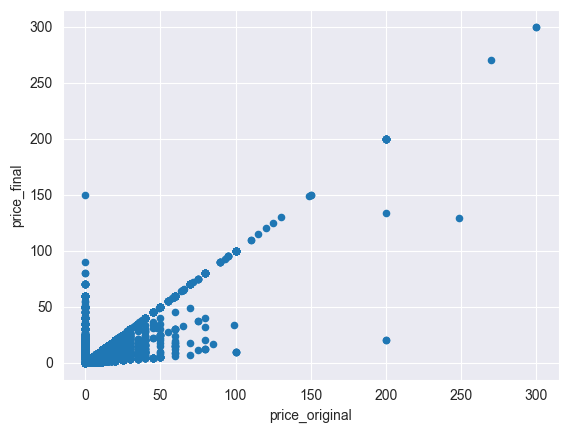

In [23]:
my_data.plot(kind='scatter', x='price_original', y='price_final')

hat valt me hier wel op dat er dus spellen zijn die eerst gratis waren en toen 150 dollar gingen kosten. Maar verder is het wel logisch dat de meestes of net goedkoper geworden zijn of de zelfde prijs zijn gebleven.

<Axes: xlabel='user_reviews', ylabel='price_final'>

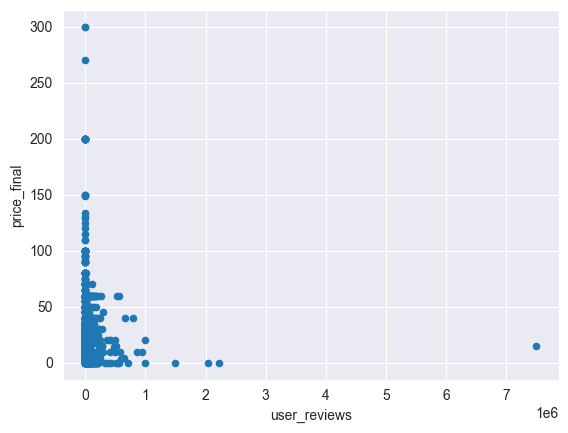

In [26]:
my_data.plot(kind='scatter', x='user_reviews', y='price_final')

dit is zeker interresant, het maakt dus inderdaad gewoon niet uit wat de prijs is, user_reviews aantal staat compleet los daarvan.

<Axes: xlabel='positive_ratio', ylabel='price_final'>

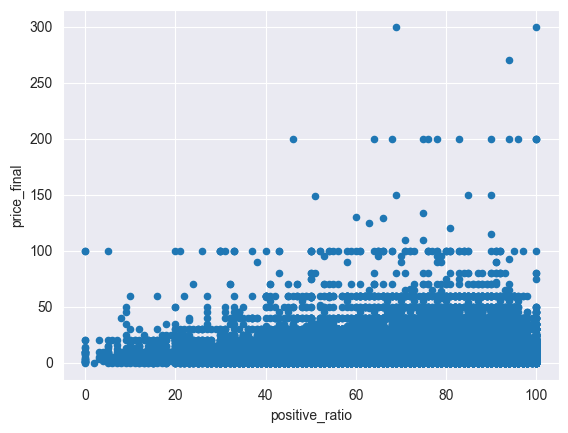

In [27]:
my_data.plot(kind='scatter', x='positive_ratio', y='price_final')

dit is ook wel interresant om te zien, wel grappig om te zien dat vanaf iets meer dan 100 dollar er geen ratio onder de 40 meer is. Maar omdat dit maar een handje vol is vergeleken met alle spellen  onder de 100 dollar is er geen relation te vinden hier.

## Resultaat (deel2)

1.ik ben slecht met het voorspellen met hypotheses
2.een boolean telt wel in een correlation table, maar niet voor een scatterchart.
3.als een spel mac supported is is het meestal ook linux supported.
4.de meeste spellen blijven ongeveer de zelfde prijs als op release
5.prijs heeft geen verband met het aantal reviews, en ook niet met hoe goed het spel is.